# Spark and Friends

## Reading data

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_sp = spark.read.csv("sample_stocks.csv", header=True)

In [2]:
from optimus import Optimus
op = Optimus()
df_op = op.load.url("https://raw.githubusercontent.com/databricks/koalas/master/data/sample_stocks.csv")

In [10]:
import databricks.koalas as ks

df = ks.read_csv("https://raw.githubusercontent.com/databricks/koalas/master/data/sample_stocks.csv") # error

Py4JJavaError: An error occurred while calling o90.csv.
: java.io.IOException: No FileSystem for scheme: https
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:2660)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2667)
	at org.apache.hadoop.fs.FileSystem.access$200(FileSystem.java:94)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:2703)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:2685)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:373)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:295)
	at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$checkAndGlobPathIfNecessary$1(DataSource.scala:547)
	at scala.collection.TraversableLike.$anonfun$flatMap$1(TraversableLike.scala:244)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at scala.collection.TraversableLike.flatMap(TraversableLike.scala:244)
	at scala.collection.TraversableLike.flatMap$(TraversableLike.scala:241)
	at scala.collection.immutable.List.flatMap(List.scala:355)
	at org.apache.spark.sql.execution.datasources.DataSource.checkAndGlobPathIfNecessary(DataSource.scala:545)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:359)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:223)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.csv(DataFrameReader.scala:615)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:564)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:844)


In [3]:
import pandas as pd 

df_pd = pd.read_csv("https://raw.githubusercontent.com/databricks/koalas/master/data/sample_stocks.csv")

In [4]:
import databricks.koalas as ks

df_ks = ks.read_csv("sample_stocks.csv")

In [30]:
from optimus import Optimus
op = Optimus()
df_op_local = op.load.csv("sample_stocks.csv")

In [33]:
print(type(df_sp))
print(type(df_op))
print(type(df_pd))
print(type(df_ks))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'databricks.koalas.frame.DataFrame'>


In [34]:
df_sp.show(1)

+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+
|      Date|  Open|  High|   Low| Close|    Volume|ExDividend|SplitRatio|AdjOpen|AdjHigh|AdjLow|AdjClose| AdjVolume|Symbol|
+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+
|2018-03-27|173.68|175.15|166.92|168.34|38962839.0|       0.0|       1.0| 173.68| 175.15|166.92|  168.34|38962839.0|  AAPL|
+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+
only showing top 1 row



In [36]:
df_op.show(1)

+-------------------+------+------+------+------+-----------+----------+----------+-------+-------+------+--------+-----------+------+
|               Date|  Open|  High|   Low| Close|     Volume|ExDividend|SplitRatio|AdjOpen|AdjHigh|AdjLow|AdjClose|  AdjVolume|Symbol|
+-------------------+------+------+------+------+-----------+----------+----------+-------+-------+------+--------+-----------+------+
|2018-03-27 00:00:00|173.68|175.15|166.92|168.34|3.8962839E7|       0.0|       1.0| 173.68| 175.15|166.92|  168.34|3.8962839E7|  AAPL|
+-------------------+------+------+------+------+-----------+----------+----------+-------+-------+------+--------+-----------+------+
only showing top 1 row



In [37]:
df_pd.head(1)

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Symbol
0,2018-03-27,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0,AAPL


In [42]:
df_ks.show()

AttributeError: 'DataFrame' object has no attribute 'show'

In [43]:
df_ks.head(1)

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Symbol
0,2018-03-27,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0,AAPL


In [44]:
df_op.table(1)

Date 1 (timestamp) nullable,Open 2 (double) nullable,High 3 (double) nullable,Low 4 (double) nullable,Close 5 (double) nullable,Volume 6 (double) nullable,ExDividend 7 (double) nullable,SplitRatio 8 (double) nullable,AdjOpen 9 (double) nullable,AdjHigh 10 (double) nullable,AdjLow 11 (double) nullable,AdjClose 12 (double) nullable,AdjVolume 13 (double) nullable,Symbol 14 (string) nullable
2018-03-26⸱17:00:00,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0,AAPL


## Selecting data

### With Spark

In [90]:
%%time
df_sp["Date","Open","High","Volume"].show(1)

+----------+------+------+----------+
|      Date|  Open|  High|    Volume|
+----------+------+------+----------+
|2018-03-27|173.68|175.15|38962839.0|
+----------+------+------+----------+
only showing top 1 row

CPU times: user 3 ms, sys: 5 ms, total: 8 ms
Wall time: 105 ms


In [91]:
%%time
df_sp.select("Date","Open","High","Volume").show(1)

+----------+------+------+----------+
|      Date|  Open|  High|    Volume|
+----------+------+------+----------+
|2018-03-27|173.68|175.15|38962839.0|
+----------+------+------+----------+
only showing top 1 row

CPU times: user 6 ms, sys: 2 ms, total: 8 ms
Wall time: 174 ms


### With Optimus

In [89]:
%%time
df_op["Date","Open","High","Volume"].table(1)

Date 1 (timestamp) nullable,Open 2 (double) nullable,High 3 (double) nullable,Volume 4 (double) nullable
2018-03-26⸱17:00:00,173.68,175.15,38962839.0


CPU times: user 25 ms, sys: 4 ms, total: 29 ms
Wall time: 369 ms


In [88]:
%%time
df_op.select("Date","Open","High","Volume").table(1)

Date 1 (timestamp) nullable,Open 2 (double) nullable,High 3 (double) nullable,Volume 4 (double) nullable
2018-03-26⸱17:00:00,173.68,175.15,38962839.0


CPU times: user 27 ms, sys: 6 ms, total: 33 ms
Wall time: 306 ms


In [83]:
df_op.cols.select([0,1,2,5]).table(1)

Date 1 (timestamp) nullable,Open 2 (double) nullable,High 3 (double) nullable,Volume 4 (double) nullable
2018-03-26⸱17:00:00,173.68,175.15,38962839.0


### With Pandas

In [87]:
%%time
df_pd[["Date","Open","High","Volume"]].head(1)

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 2.69 ms


,Date,Open,High,Volume
0,2018-03-27,173.68,175.15,38962839.0


In [92]:
%%time
df_pd.iloc[:, [0,1,2,4]].head(1)

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 2.71 ms


,Date,Open,High,Close
0,2018-03-27,173.68,175.15,168.34


### With Koalas

In [86]:
%%time
df_ks[["Date","Open","High","Volume"]].head(1)

CPU times: user 6 ms, sys: 0 ns, total: 6 ms
Wall time: 85.3 ms


,Date,Open,High,Volume
0,2018-03-27,173.68,175.15,38962839.0


In [72]:
df_ks.iloc[:, [0,1,2,4]].head(1) # will fail

AttributeError: 'DataFrame' object has no attribute 'iloc'

In [73]:
df_ks.select("Date","Open","High","Volume") # Will fail

PandasNotImplementedError: The method `pd.DataFrame.select()` is not implemented yet.

## More advance stuff

In [96]:
# Pandas
%%time
df_pd["Symbol"].value_counts()

CPU times: user 3 ms, sys: 1e+03 µs, total: 4 ms
Wall time: 3.73 ms


MSFT    2071
AAPL    2070
GOOG    1007
Name: Symbol, dtype: int64

In [97]:
# Koalas
%%time
df_ks["Symbol"].value_counts()

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 98.3 ms


MSFT    2071
AAPL    2070
GOOG    1007
Name: Symbol, dtype: int64

In [98]:
# Spark
%%time
df_sp.groupBy('Symbol').count().show()

+------+-----+
|Symbol|count|
+------+-----+
|  AAPL| 2070|
|  GOOG| 1007|
|  MSFT| 2071|
+------+-----+

CPU times: user 8 ms, sys: 1 ms, total: 9 ms
Wall time: 1.46 s


In [99]:
# Optimus
%%time
df_op.groupBy('Symbol').count().show()

+------+-----+
|Symbol|count|
+------+-----+
|  AAPL| 2070|
|  GOOG| 1007|
|  MSFT| 2071|
+------+-----+

CPU times: user 6 ms, sys: 2 ms, total: 8 ms
Wall time: 1.13 s


In [107]:
# Optimus
%%time
df_op.cols.frequency("Symbol")["Symbol"]

CPU times: user 16 ms, sys: 2 ms, total: 18 ms
Wall time: 1.06 s


[{'value': 'MSFT', 'count': 2071},
 {'value': 'AAPL', 'count': 2070},
 {'value': 'GOOG', 'count': 1007}]

### One-Hot-Encoding

In [132]:
%%time
pd.get_dummies(data=df_pd, columns=["Symbol"]).head(1) # This is crazy easy

CPU times: user 7 ms, sys: 3 ms, total: 10 ms
Wall time: 10.2 ms


,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Symbol_AAPL,Symbol_GOOG,Symbol_MSFT
0,2018-03-27,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0,1,0,0


In [133]:
%%time
ks.get_dummies(data=df_ks, columns=["Symbol"]).head(1) # This is crazy easy too

CPU times: user 35 ms, sys: 9 ms, total: 44 ms
Wall time: 350 ms


,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,Symbol_AAPL,Symbol_GOOG,Symbol_MSFT
0,2018-03-27,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0,1,0,0


In [134]:
%%time
# I hate this
from pyspark.ml.feature import StringIndexer,OneHotEncoderEstimator

indexer = StringIndexer(inputCol="Symbol", outputCol="SymbolIndex")
df_sp_indexed = indexer.fit(df_sp).transform(df_sp)

encoder = OneHotEncoderEstimator(inputCols=["SymbolIndex"],
                                 outputCols=["SymbolVec"])

model = encoder.fit(df_sp_indexed)
df_sp_encoded = model.transform(df_sp_indexed)
df_sp_encoded.show(1)

+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+-----------+-------------+
|      Date|  Open|  High|   Low| Close|    Volume|ExDividend|SplitRatio|AdjOpen|AdjHigh|AdjLow|AdjClose| AdjVolume|Symbol|SymbolIndex|    SymbolVec|
+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+-----------+-------------+
|2018-03-27|173.68|175.15|166.92|168.34|38962839.0|       0.0|       1.0| 173.68| 175.15|166.92|  168.34|38962839.0|  AAPL|        1.0|(2,[1],[1.0])|
+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+-----------+-------------+
only showing top 1 row

CPU times: user 24 ms, sys: 1e+03 µs, total: 25 ms
Wall time: 333 ms


In [135]:
%%time
from optimus.ml.feature import string_to_index, one_hot_encoder

df_sp_indexed = string_to_index(df_sp, "Symbol")
df_sp_encoded = one_hot_encoder(df_sp_indexed, "Symbol_index")
df_sp_encoded.show(1)

+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+------------+--------------------+
|      Date|  Open|  High|   Low| Close|    Volume|ExDividend|SplitRatio|AdjOpen|AdjHigh|AdjLow|AdjClose| AdjVolume|Symbol|Symbol_index|Symbol_index_encoded|
+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+------------+--------------------+
|2018-03-27|173.68|175.15|166.92|168.34|38962839.0|       0.0|       1.0| 173.68| 175.15|166.92|  168.34|38962839.0|  AAPL|         1.0|       (2,[1],[1.0])|
+----------+------+------+------+------+----------+----------+----------+-------+-------+------+--------+----------+------+------------+--------------------+
only showing top 1 row

CPU times: user 21 ms, sys: 1e+03 µs, total: 22 ms
Wall time: 332 ms


## Plots

### Pandas

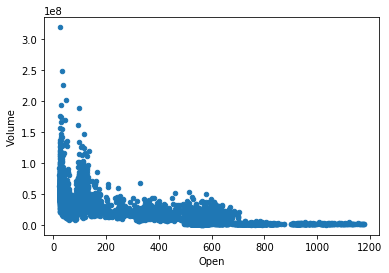

In [25]:
df_pd.plot.scatter("Open","Volume")

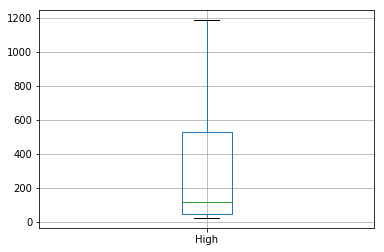

In [14]:
df_pd.boxplot("High")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67a564d9e8>]],
      dtype=object)

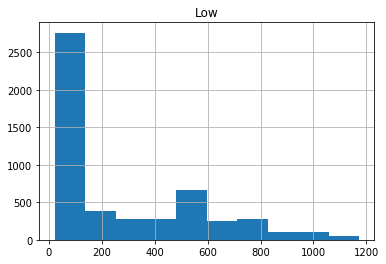

In [15]:
df_pd.hist("Low")

### Koalas

In [17]:
df_ks.hist("Low")

PandasNotImplementedError: The method `pd.DataFrame.hist()` is not implemented yet.

### Spark

In [ ]:
# ...

### Optimus

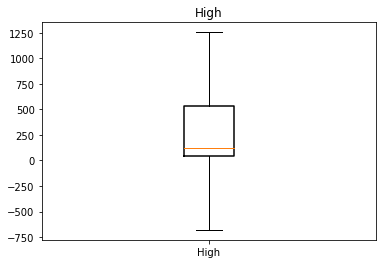

<Figure size 864x360 with 0 Axes>

In [20]:
df_op.plot.boxplot("High")

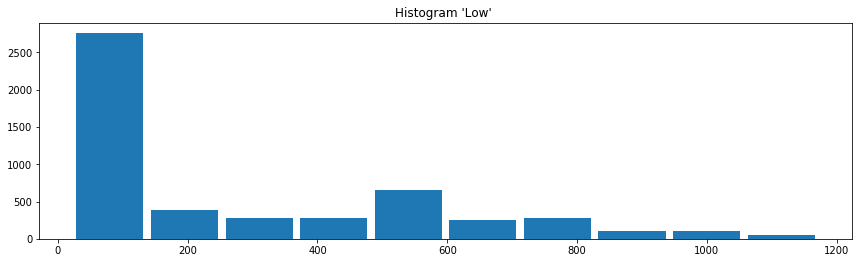

In [21]:
df_op.plot.hist("Low")

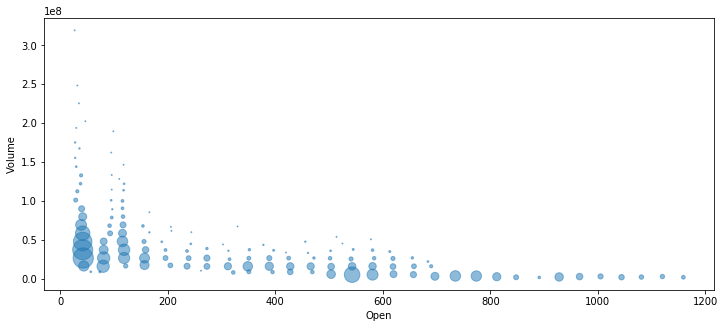

In [24]:
df_op.plot.scatterplot(["Open","Volume"])